In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

POPDENS_PATH = '/ihme/covid-19/deaths/mobility_inputs/2020_04_14/pop_density.csv'
COVID_PATH = '/ihme/covid-19/deaths-outputs/best/model_results.csv'
COVID_POP_PATH = '/ihme/covid-19/deaths-outputs/best/model_data.csv'


In [2]:
popdens_df = pd.read_csv(POPDENS_PATH)

In [7]:
pop_df = pd.read_csv(COVID_POP_PATH)
pop_df = pop_df[['location_id', 'population']].drop_duplicates()
covid_df = pd.read_csv(COVID_PATH)
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['deaths'] = covid_df[[f'draw_{d}' for d in range(1000)]].mean(axis=1)
covid_df = covid_df.drop([f'draw_{d}' for d in range(1000)], axis=1)

covid_df = covid_df.sort_values(['location_id', 'date']).reset_index(drop=True)
first_date = covid_df['date'] == covid_df.groupby('location_id')['date'].transform(min)
covid_df['Daily deaths'] = np.diff(covid_df['deaths'], prepend=np.nan)
covid_df.loc[first_date, 'Daily deaths'] = covid_df['deaths']
covid_df = covid_df.groupby('location_id', as_index=False)['Daily deaths'].max()
covid_df = covid_df.merge(pop_df)
covid_df['peak_rate'] = covid_df['Daily deaths'] / covid_df['population']


In [9]:
df = popdens_df[['location_id', 'location_name', 'pop_density', 'pop_proportion']].merge(covid_df)

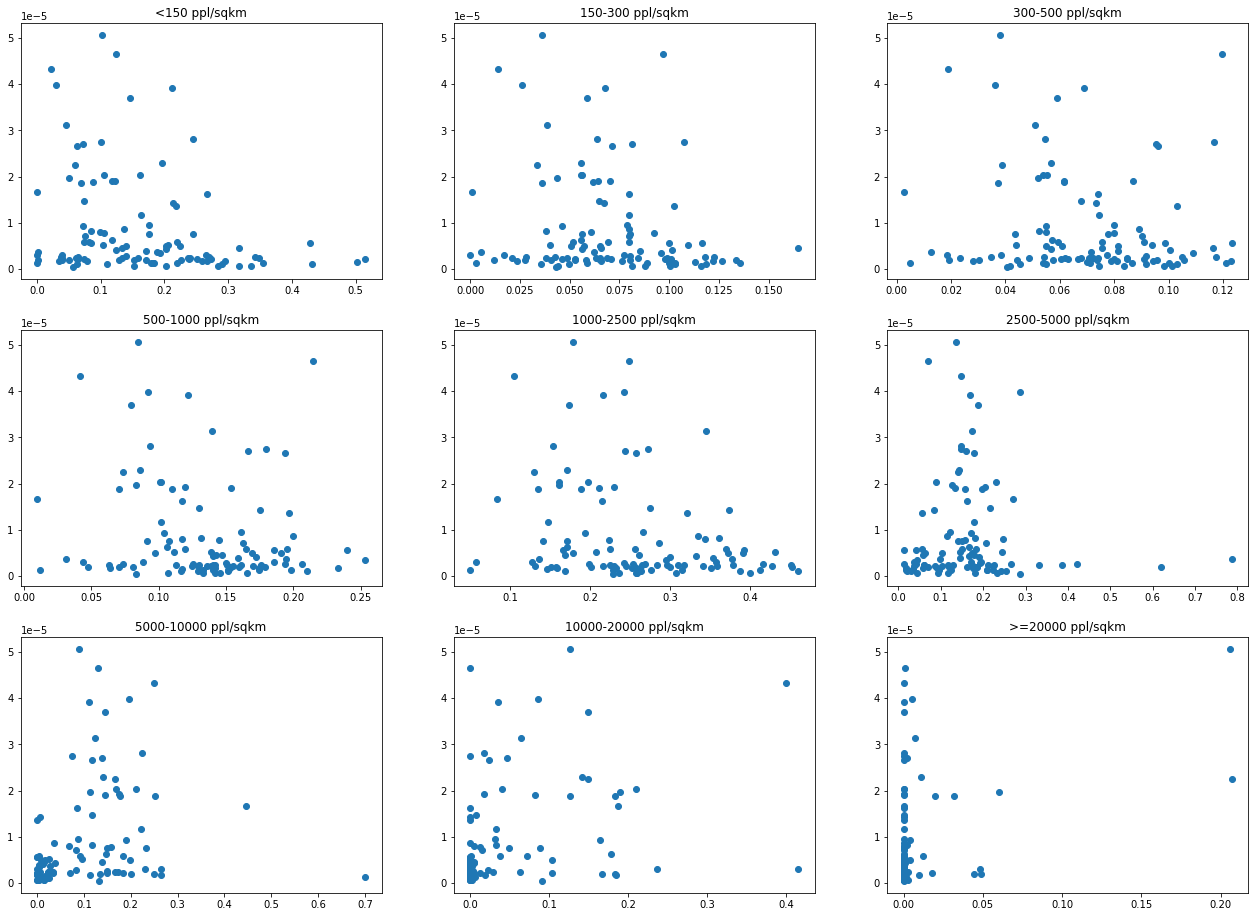

In [12]:
pds = df['pop_density'].unique().tolist()
fig, ax = plt.subplots(3, 3, figsize=(22, 16))
for i, pd in enumerate(pds):
    col = int(i/3)
    row = i % 3
    plot_df = df.loc[df['pop_density'] == pd].reset_index(drop=True)
    ax[col, row].scatter(plot_df['pop_proportion'], plot_df['peak_rate'])
    ax[col, row].set_title(pd)
    

In [22]:
df.loc[df['location_name'] == 'DC']

,location_id,location_name,pop_density,pop_proportion,Daily deaths,population,peak_rate
567,531,DC,<150 ppl/sqkm,0.000618,10.789265,650224.510865,0.000017
568,531,DC,150-300 ppl/sqkm,0.000662,10.789265,650224.510865,0.000017
569,531,DC,300-500 ppl/sqkm,0.002514,10.789265,650224.510865,0.000017
570,531,DC,500-1000 ppl/sqkm,0.009671,10.789265,650224.510865,0.000017
571,531,DC,1000-2500 ppl/sqkm,0.083929,10.789265,650224.510865,0.000017
572,531,DC,2500-5000 ppl/sqkm,0.270878,10.789265,650224.510865,0.000017
573,531,DC,5000-10000 ppl/sqkm,0.445531,10.789265,650224.510865,0.000017
574,531,DC,10000-20000 ppl/sqkm,0.187223,10.789265,650224.510865,0.000017
575,531,DC,>=20000 ppl/sqkm,0.000000,10.789265,650224.510865,0.000017
